# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import this

In [62]:
# Expliciting the Pandas and Numpy Versions (Don't know how to do that for the other 
# libraries)
print("pandas version:", pd.__version__)
print("numpy version: ", np.__version__)

pandas version: 0.25.1
numpy version:  1.17.2


In [6]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [16]:
#your code here
round(diamonds.groupby("color")["price"].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
0,2808.0,5323.82,4438.19,335.0,1860.5,4234.0,7695.00,18710.0
1,5422.0,5091.87,4722.39,334.0,1120.5,3730.0,7201.75,18823.0
2,8302.0,4484.96,4213.82,337.0,984.0,3455.5,5978.50,18803.0
3,11290.0,3998.15,4050.55,354.0,931.0,2241.5,6048.00,18818.0
4,9539.0,3725.09,3785.50,342.0,982.0,2344.0,4867.50,18791.0
5,9797.0,3076.75,3344.16,326.0,882.0,1739.0,4003.00,18731.0
6,6774.0,3168.11,3353.39,357.0,911.0,1836.5,4212.50,18693.0


In [ ]:
#your comments here
"""
round(diamonds.groupby("color").describe(), 2):
From a readability standpoint, this doesn't seem to be the clearest way to access this
information, as it is overloaded. 

round(diamonds.groupby("color")["price"].describe(), 2):
This is hard to interpret, as the values are..? The price?

Also: What is it meant by "variablity"? How it changes from color to color?

Assuming that they are indeed the price (and that variability is how the values change 
regarding color):

There are few diamonds with color <= 1 (aprox. 5% + aprox 10% for a total of aprox. 15%),
and while the mean of the prices seems to drop (5 323.82 to 3 168.11) the higher the color
(5 to 6 being the exception), the max value varies very little (from 18 693 in 6, to 
18 823 in 1). The distribuition on the other metrics (std, min, 25% and 50%) seem to 
indicate low variance as well, with the 75% having a higher variance of values depending
on wheter the color is closer to 0 or closer to 6 (with 5 to 6 also being the exception of 
the values dropping from 0 to 6).
"""

In [19]:
# considering the following question, I don't think I did what it was intended; maybe it
# was this?
round(diamonds.groupby("price").describe(), 2)

carat                                           color       ...     y  \
      count  mean   std   min   25%   50%   75%   max count mean  ...   75%   
price                                                             ...         
326     2.0  0.22  0.01  0.21  0.22  0.22  0.22  0.23   2.0  5.0  ...  3.94   
327     1.0  0.23   NaN  0.23  0.23  0.23  0.23  0.23   1.0  5.0  ...  4.07   
334     1.0  0.29   NaN  0.29  0.29  0.29  0.29  0.29   1.0  1.0  ...  4.23   
335     1.0  0.31   NaN  0.31  0.31  0.31  0.31  0.31   1.0  0.0  ...  4.35   
336     2.0  0.24  0.00  0.24  0.24  0.24  0.24  0.24   2.0  0.5  ...  3.97   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   ...   
18803   1.0  2.00   NaN  2.00  2.00  2.00  2.00  2.00   1.0  2.0  ...  8.01   
18804   1.0  2.07   NaN  2.07  2.07  2.07  2.07  2.07   1.0  3.0  ...  8.12   
18806   1.0  1.51   NaN  1.51  1.51  1.51  1.51  1.51   1.0  3.0  ...  7.41   
18818   1.0  2.00   NaN  2.00  2.00  2.00  2.00  2.00   1.0  3.0  ...  7.97   
18823   1.0  2.29   NaN  2.29  2.29  2.29  2.29  2.29   1.0  1.0  ...  8.47   

                z                                            
        max count  mean   std   min   25%   50%   75%   max  
price                                                        
326    3.98   2.0  2.38  0.09  2.31  2.34  2.38  2.41  2.44  
327    4.07   1.0  2.31   NaN  2.31  2.31  2.31  2.31  2.31  
334    4.23   1.0  2.63   NaN  2.63  2.63  2.63  2.63  2.63  
335    4.35   1.0  2.75   NaN  2.75  2.75  2.75  2.75  2.75  
336    3.98   2.0  2.48  0.01  2.47  2.47  2.48  2.48  2.48  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
18803  8.01   1.0  5.01   NaN  5.01  5.01  5.01  5.01  5.01  
18804  8.12   1.0  5.10   NaN  5.10  5.10  5.10  5.10  5.10  
18806  7.41   1.0  4.56   NaN  4.56  4.56  4.56  4.56  4.56  
18818  7.97   1.0  5.04   NaN  5.04  5.04  5.04  5.04  5.04  
18823  8.47   1.0  5.16   NaN  5.16  5.16  5.16  5.16  5.16  

[11600 rows x 64 columns]

In [23]:
# again I don't think that's the case, so
round(diamonds.describe(), 2)

,carat,color,clarity,depth,table,price,x,y,z
count,53932.00,53932.00,53932.00,53932.00,53932.00,53932.00,53932.00,53932.00,53932.00
mean,0.80,3.41,3.05,61.75,57.46,3932.14,5.73,5.73,3.54
std,0.47,1.70,1.65,1.43,2.23,3988.73,1.12,1.11,0.70
min,0.20,0.00,0.00,43.00,43.00,326.00,3.73,0.00,2.24
25%,0.40,2.00,2.00,61.00,56.00,949.75,4.71,4.72,2.91
50%,0.70,3.00,3.00,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,5.00,4.00,62.50,59.00,5324.00,6.54,6.54,4.04
max,5.01,6.00,7.00,79.00,95.00,18823.00,10.74,9.95,19.73


In [27]:
# and if the idea is to check which features I think will affect price the most, I think
# this makes more sense:

# Now we see that the carat has the most significant relation with the price (aprox. 0.92, 
# with the dimensional measurements (x, y and z) following close (in this regard it might
# make sense to add a column "volume" derived from the dimensional measurements, as it might
# provide an even better relation with the 'price'). 
diamonds.corr()

,carat,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.291447,-0.352877,0.028221,0.181658,0.921610,0.977765,0.971799,0.971797
color,-0.291447,1.000000,-0.025678,-0.047300,-0.026511,-0.172569,-0.270780,-0.269438,-0.273598
clarity,-0.352877,-0.025678,1.000000,-0.067286,-0.160401,-0.146886,-0.373009,-0.366331,-0.374642
depth,0.028221,-0.047300,-0.067286,1.000000,-0.295700,-0.010670,-0.025097,-0.028868,0.096662
table,0.181658,-0.026511,-0.160401,-0.295700,1.000000,0.127165,0.196130,0.189501,0.154635
price,0.921610,-0.172569,-0.146886,-0.010670,0.127165,1.000000,0.887227,0.886205,0.877901
x,0.977765,-0.270780,-0.373009,-0.025097,0.196130,0.887227,1.000000,0.995547,0.986392
y,0.971799,-0.269438,-0.366331,-0.028868,0.189501,0.886205,0.995547,1.000000,0.978898
z,0.971797,-0.273598,-0.374642,0.096662,0.154635,0.877901,0.986392,0.978898,1.000000


Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [28]:
#your hypotheses here
"""
Hypothesis 1: The best predictor of 'price' is the 'carat' value;

Hypothesis 2: A value (volume) derived from the dimensional measurements (x, y and z) might
              provide a great predictor of 'price';

Hypothesis 3: A value derived from the relationship between volume and carat might be the 
              best predictor of 'price'.
"""

"\nHypothesis 1: The best predictor of 'price' is the 'carat' value;\n\nHypothesis 2: A value (volume) derived from the dimensional measurements (x, y and z) might\n              provide a great predictor of 'price';\n\nHypothesis 3: A value derived from the relationship between volume and carat might be the \n              best predictor of 'price'.\n"

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [31]:
#your code here
# I think this was what was asked (I'm rounding for the sake of readability):
round(diamonds.groupby("color").mean(), 2)

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.16,2.78,61.89,57.81,5323.82,6.52,6.51,4.03
1,1.03,2.96,61.85,57.58,5091.87,6.22,6.22,3.85
2,0.91,2.93,61.84,57.52,4484.96,5.98,5.98,3.70
3,0.77,3.46,61.76,57.29,3998.15,5.68,5.68,3.51
4,0.74,3.13,61.69,57.43,3725.09,5.62,5.62,3.47
5,0.66,2.97,61.66,57.49,3076.75,5.41,5.42,3.34
6,0.66,2.69,61.70,57.40,3168.11,5.42,5.42,3.34


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
#your thoughts here
"""
'price' goes down as the 'color' number increases [so the mean 'price' goes down the better
the quality of the 'color', which is... unexpected. But I think it has more to due because 
the average carat is decressing (and that has a higher correlation coefficient with 'price';
see that for the last two —5 and 6— where the carat remains the same, the mean 'price' 
actually goes UP. The dimentional measurements also more or less stabilze, and the clarity
actually decreases.)]
"""

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

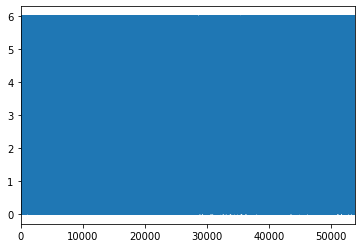

In [46]:
#your code here
# doesn't a history plot, or a seaborn sns.distplot make more sense to show the Frequency
# Distribution?
#plt.hist(diamonds["color"])#, bins = [0, 1, 2, 3, 4, 5, 6])

# ??
diamonds["color"].plot()

#plt.title("Color Frequency Distribuition")
#plt.xlabel('Color Quality (0 Worst, 6 Best)')
#plt.ylabel('Count')
plt.show()

In [ ]:
#your comments here
"""
I'm confused. (and am unable to analise the above plot as is)
"""

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [47]:
#your code here
round(diamonds.groupby("carat").mean(), 2)

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.17,2.83,61.10,59.33,365.17,3.79,3.75,2.30
0.21,5.44,2.67,60.51,58.44,380.22,3.87,3.84,2.33
0.22,4.80,2.60,61.62,60.40,391.40,3.90,3.85,2.39
0.23,4.52,4.90,61.43,58.03,486.14,3.95,3.97,2.43
0.24,4.19,4.97,61.60,57.49,505.19,3.99,4.02,2.47
...,...,...,...,...,...,...,...,...
4.00,1.00,0.00,63.30,58.00,15984.00,10.01,9.93,6.31
4.01,0.50,0.00,61.75,61.50,15223.00,10.08,4.97,6.20
4.13,2.00,0.00,64.80,61.00,17329.00,10.00,9.85,6.43


In [ ]:
#your comments
"""
I think I'm doing something wrong or not understanding something, for using floating points
to analise as if they where cardinal numbers doesn't really tells us much (still too 
granular). 
"""


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

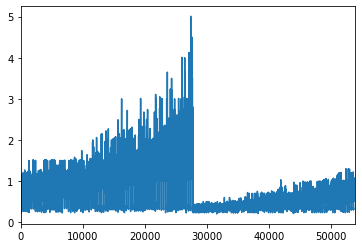

In [49]:
#your code here
# ??
diamonds["carat"].plot()

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [51]:
#your code here
round(diamonds.groupby("table").mean(), 2)

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.04,1.0,4.00,62.90,4997.0,6.45,6.40,4.04
44.0,0.29,5.0,4.00,62.80,474.0,4.20,4.24,2.65
49.0,0.65,3.0,3.00,64.25,2290.5,5.36,5.32,3.42
50.0,1.51,3.0,2.00,61.50,8995.5,7.38,7.30,4.51
50.1,0.94,2.0,1.00,66.00,3353.0,6.13,6.17,4.06
...,...,...,...,...,...,...,...,...
71.0,0.68,3.0,2.00,58.00,1633.0,5.85,5.70,3.35
73.0,0.60,4.5,3.25,68.90,2406.5,5.52,5.46,3.75
76.0,0.79,3.0,2.00,65.30,2362.0,5.52,5.14,3.48


In [52]:
#your comments here
"""
¯\_(ツ)_/¯
"""

'\n¯\\_(ツ)_/¯\n'

**Finally, do the same with the `clarity` column.**

In [53]:
#your code here
round(diamonds.groupby("clarity").mean(), 2)

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0,1.28,2.97,62.73,58.30,3924.17,6.76,6.67,4.22
1,1.08,3.47,61.77,57.93,5062.27,6.40,6.39,3.95
2,0.85,3.45,61.85,57.66,3996.00,5.89,5.89,3.64
3,0.76,3.49,61.72,57.42,3924.17,5.66,5.66,3.49
4,0.73,3.16,61.67,57.31,3839.14,5.57,5.58,3.44
5,0.60,3.57,61.66,57.02,3283.74,5.22,5.23,3.22
6,0.50,3.35,61.62,56.88,2519.51,4.96,4.98,3.06
7,0.51,3.10,61.51,56.51,2864.84,4.97,4.99,3.06


In [54]:
#your comments here
"""
Here I can gather something :)

So: The lower the 'clarity' (0) the higher the mean 'carat' value (except for 6 to 7). The 
mean 'price' is... fluctuating, but with a small tendency to decrease the higher the 
'clarity' value (except from 6 to 7 and 0 to 1).
"""

"\nHere I can gather something :)\nSo: The lower the 'clarity' (0) the higher the 'carat'.\n"

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [55]:
#your thoughts here
# I'm keeping what I said from the correlation matrix (and only guiding myself from it,
# since I certainly did something wrong here). So:

# We see that the carat has the most significant relation with the price (aprox. 0.92, 
# with the dimensional measurements (x, y and z) following close (in this regard it might
# make sense to add a column "volume" derived from the dimensional measurements, as it might
# provide an even better relation with the 'price'). 

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


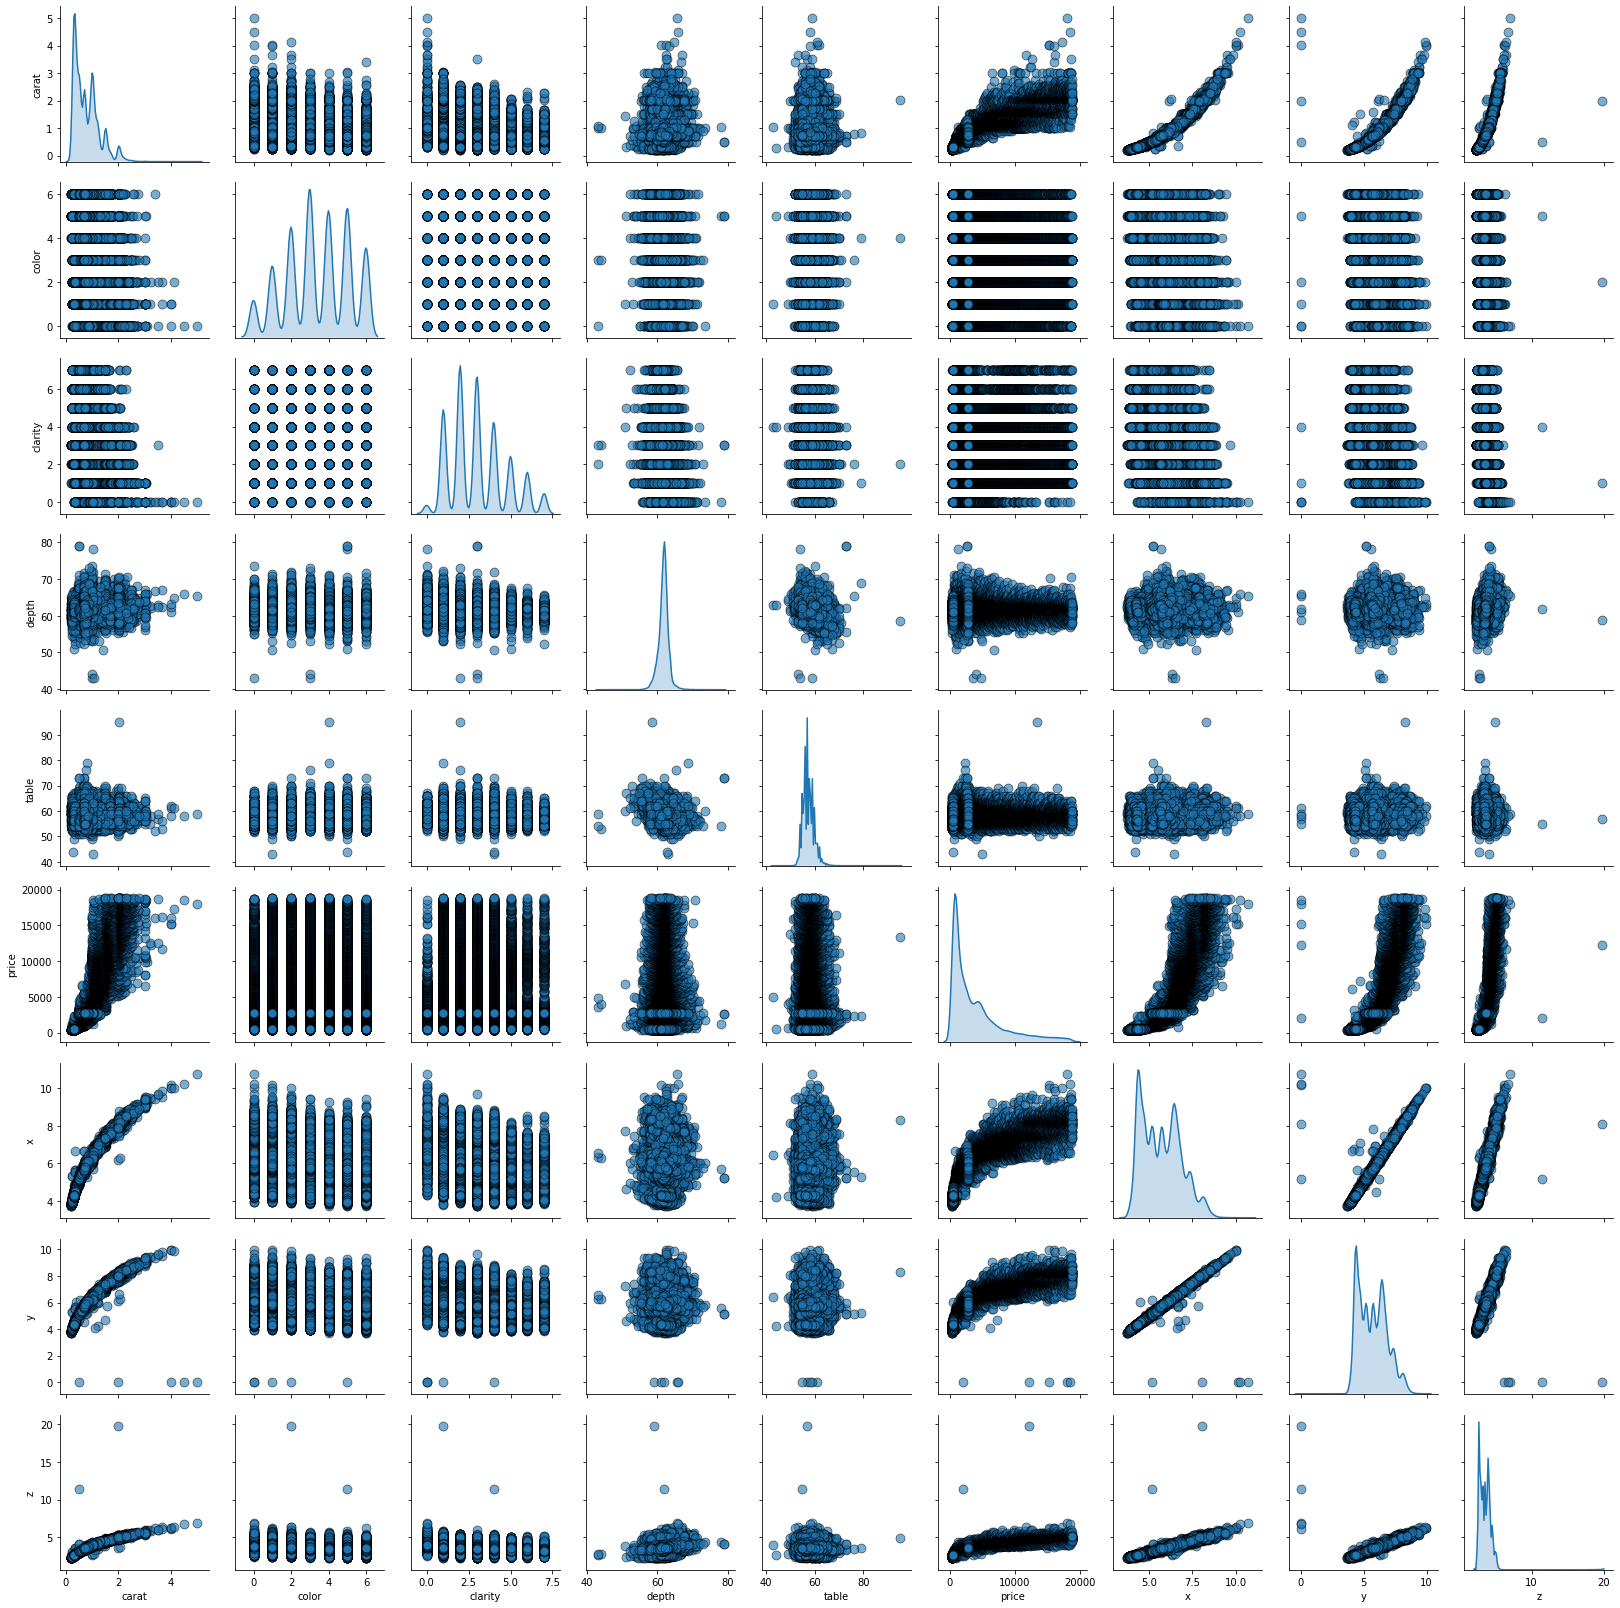

In [56]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 
                                                      'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
"""
essentially 'carat', 'price' and the spatial dimensions among themselves (as we'd seen with
the correlation matrix, which in not suprising since this is, essentially, a visual 
correlation matrix).
"""

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

"\naccording to: \nhttps://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot\n\nThe current version of matplotlib broke heatmaps. \nThe solution is to downgrade the package to 3.1.0, but it doesn't work when I try to do it\n(similarly, It's not updating Pandas to its most current version either. :/)\n"

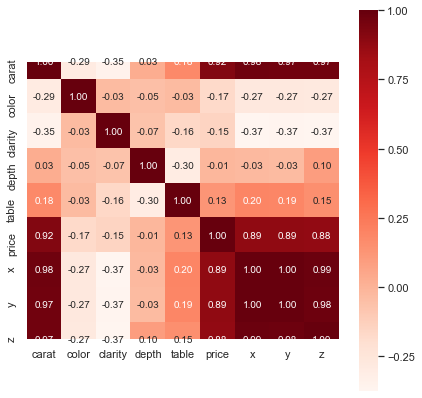

In [96]:
# your code here
# Creating a correlation matrix
corr_matrix = diamonds.corr()

# setting the plot and the axis style
sns.set()
sns.axes_style()
 
# Creating a mask to cover the repeated correlation coefficients: didn't use, but could with
# mask = mask
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Plotting the matrix
fig, ax = plt.subplots(figsize = (7, 7))
matrix_plot = sns.heatmap(corr_matrix, xticklabels = True, 
                          yticklabels = True, annot = True, annot_kws={"size": 10}, 
                          cmap = "Reds", center = None, square = True, fmt="1.2f")

"""
according to: 
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

The current version of matplotlib broke heatmaps. 
The solution is to downgrade the package to 3.1.0, but it doesn't work when I try to do it
(similarly, It's not updating Pandas to its most current version either. :/)
"""

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here
"""
Yes, if refering to the correlation matrix (but this is the visual representation of that 
matrix).

Don't know about the rest.
"""

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

In [99]:
# Is this what you mean?
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds["price"], 
                                                               diamonds["carat"])

standard error: 1.9859879255642394e-07


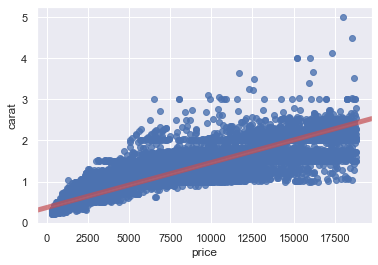

In [101]:
# your code here
# like this?
sns.regplot(x = diamonds["price"], y = diamonds["carat"], 
            line_kws={"color": "r","alpha": 0.7,"lw": 5})

# showig the standard error:
print("standard error:", std_err)

**What do you think?**

In [ ]:
#your thoughts here
"""
I don't know what to think anymore.
"""

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here
"""
To predict the 'price'? Just the dimensional measurements, like I've said.
"""

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.